<a href="https://colab.research.google.com/github/gyanoday06/facebook_marketplace/blob/main/Facebook_Marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

***Reading Data***

In [ ]:
df = pd.read_csv('Facebook_Marketplace_data.csv')

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


***Getting Count of Missing Values***

In [ ]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [ ]:
#Dropping column with all missing value
df = df.dropna(how='all', axis=1)

In [ ]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [ ]:
#ignoring col0 - as its the index
X = df.iloc[:, 1:].values

In [ ]:
X

array([['video', '4/22/2018 6:00', 529, ..., 1, 1, 0],
       ['photo', '4/21/2018 22:45', 150, ..., 0, 0, 0],
       ['video', '4/21/2018 6:17', 227, ..., 1, 0, 0],
       ...,
       ['photo', '9/21/2016 23:03', 2, ..., 0, 0, 0],
       ['photo', '9/20/2016 0:43', 351, ..., 0, 0, 0],
       ['photo', '9/10/2016 10:30', 17, ..., 0, 0, 0]], dtype=object)

***Handling Date ie: Making seperate column for (year, month, day, hour, minte)***

In [ ]:
date_series = pd.to_datetime(X[:, 1])

date_series = pd.Series(date_series)

X_year = date_series.dt.year
X_month = date_series.dt.month
X_day = date_series.dt.day
X_hour = date_series.dt.hour
X_minute = date_series.dt.minute

X_date = np.column_stack((X_year, X_month, X_day, X_hour, X_minute))

X = np.delete(X, 1, axis=1)

X = np.column_stack((X, X_date))

In [ ]:
X[0]

array(['video', 529, 512, 262, 432, 92, 3, 1, 1, 0, 2018, 4, 22, 6, 0],
      dtype=object)

***Performing OneHotEncding on 'status_type' column***

In [ ]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0])], remainder="passthrough")
X = np.array(ct.fit_transform(X)).astype(int)

In [ ]:
X[0]

array([   0,    0,    0,    1,  529,  512,  262,  432,   92,    3,    1,
          1,    0, 2018,    4,   22,    6,    0])

***Q1) How does the time of upload (`status_published`)  affects the `num_reaction`?***

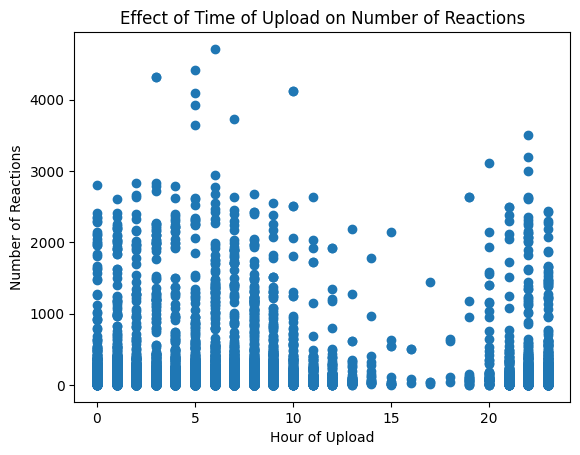

In [ ]:
plt.scatter(X[:, 16], X[:, 4])
plt.title('Effect of Time of Upload on Number of Reactions')
plt.xlabel('Hour of Upload')
plt.ylabel('Number of Reactions')
plt.show()

In [ ]:
# Aggregating data by hour
hours = X[:, 16]
reactions = X[:, 4]
hourly_reactions = {}

In [ ]:
for hour in range(24):
    hourly_reactions[hour] = np.mean(reactions[hours == hour])

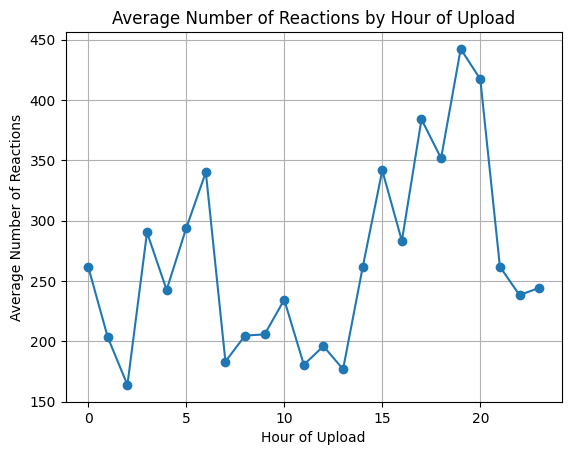

In [ ]:
plt.plot(list(hourly_reactions.keys()), list(hourly_reactions.values()), marker='o')
plt.title('Average Number of Reactions by Hour of Upload')
plt.xlabel('Hour of Upload')
plt.ylabel('Average Number of Reactions')
plt.grid()
plt.show()

In [ ]:
max_hour = max(hourly_reactions, key=hourly_reactions.get)
max_reactions = hourly_reactions[max_hour]
print(f"Hour with the highest average reactions: Hour {max_hour}, Average Reactions: {max_reactions}")

min_hour = min(hourly_reactions, key=hourly_reactions.get)
min_reactions = hourly_reactions[min_hour]
print(f"Hour with the lowest average reactions: Hour {min_hour}, Average Reactions: {min_reactions}")

Hour with the highest average reactions: Hour 19, Average Reactions: 442.36842105263156
Hour with the lowest average reactions: Hour 2, Average Reactions: 163.90761750405187


***Q2) Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?***

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000 



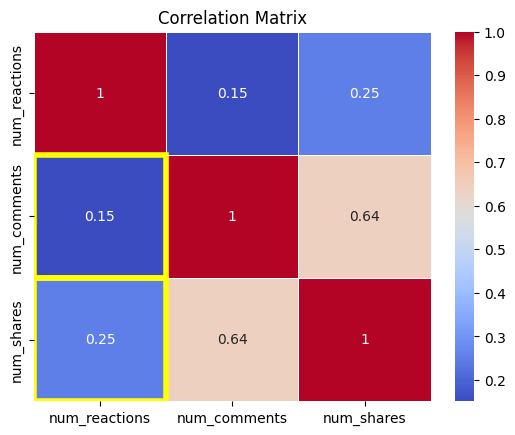

In [ ]:
corr_matrix = pd.DataFrame(X[:, [4, 5, 6]]).corr()

labels = ['num_reactions', 'num_comments', 'num_shares']

corr_matrix.index = labels
corr_matrix.columns = labels

print(corr_matrix, "\n")

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.gca().add_patch(plt.Rectangle((0, 1), 1, 1, fill=False, edgecolor='yellow', lw=4))
plt.gca().add_patch(plt.Rectangle((0, 2), 1, 1, fill=False, edgecolor='yellow', lw=4))

plt.title('Correlation Matrix')
plt.show()

num_reactions <-> num_shares = 0.25 (moderately positive correlation) ;
num_reactions <-> num_comments = 0.15 (slightly positive correlation)

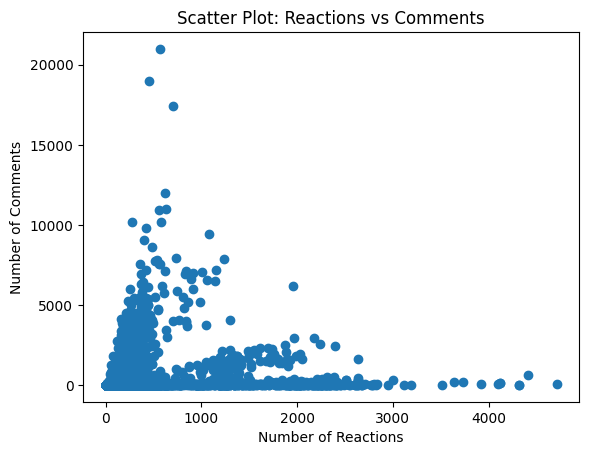

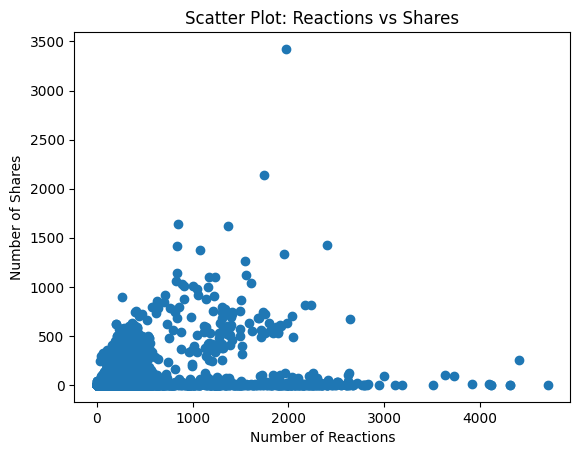

In [ ]:
#observing correlation in scatter plot:

plt.scatter(X[:, 4], X[:, 5])
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('Scatter Plot: Reactions vs Comments')
plt.show()

print("\n")

plt.scatter(X[:, 4], X[:, 6])
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Shares')
plt.title('Scatter Plot: Reactions vs Shares')
plt.show()

***Q3) Perform K-Means clustering model on the dataset***


***Q4) Use Elbow Method to get optimal number of cluseters***

In [ ]:
# Saving all cols excluding the date and time for K-Means
X_Km = X[:, 0:13]

In [ ]:
X_Km[0]

array([  0,   0,   0,   1, 529, 512, 262, 432,  92,   3,   1,   1,   0])

In [ ]:
wcss = []

In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X_Km)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

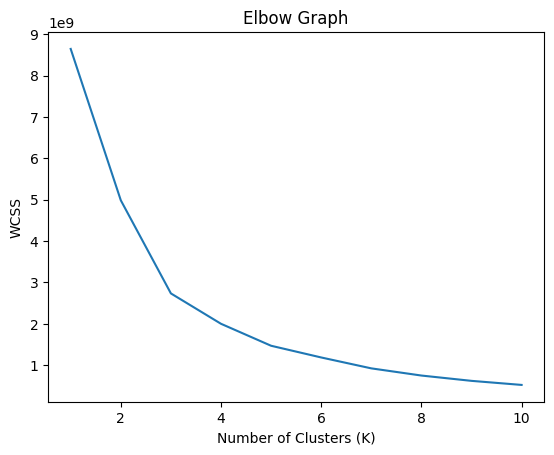

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

As we can observe from the graph, there is elbow bend at K=3. So, taking K=3.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_Km)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


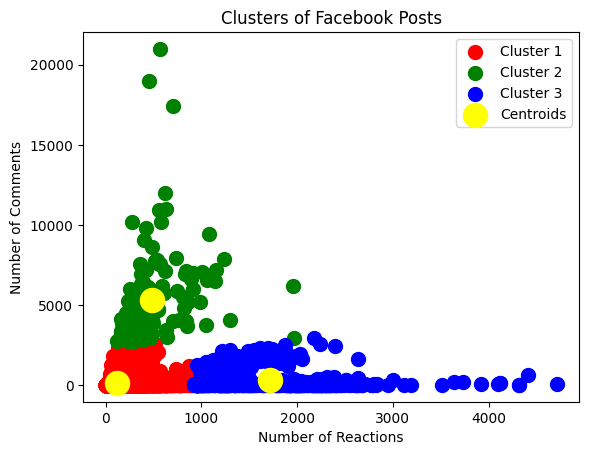

In [ ]:
plt.scatter(X_Km[y_kmeans == 0, 4], X_Km[y_kmeans == 0, 5], s=100, c='red', label='Cluster 1')
plt.scatter(X_Km[y_kmeans == 1, 4], X_Km[y_kmeans == 1, 5], s=100, c='green', label='Cluster 2')
plt.scatter(X_Km[y_kmeans == 2, 4], X_Km[y_kmeans == 2, 5], s=100, c='blue', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Facebook Posts')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.legend()
plt.show()

***Q5)	What is the count of different types of posts in the dataset?***

In [ ]:
post_type_counts = df['status_type'].value_counts()
print("Count of Different Types of Posts:")
print(post_type_counts)

Count of Different Types of Posts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


***Q6)	What is the average value of num_reaction, num_comments, num_shares for each post type?***

In [ ]:
average_values = df.groupby('status_type').agg({
    'num_reactions': 'mean',
    'num_comments': 'mean',
    'num_shares': 'mean'
}).reset_index()

print("Average Values for Each Post Type:")
print(average_values)

Average Values for Each Post Type:
  status_type  num_reactions  num_comments  num_shares
0        link     370.142857      5.698413    4.396825
1       photo     181.290345     15.993470    2.553871
2      status     438.783562     36.238356    2.558904
3       video     283.409597    642.478149  115.679949


# ***By: Gyanoday Kothari***